In [ ]:
import numpy as np
import pandas as pd

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from PIL import Image
from matplotlib.pyplot import figure

In [ ]:
import numpy as np
import pandas as pd

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import tensorflow as tf  # TensorFlow for machine learning tasks
import seaborn as sns    # Seaborn for statistical visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
from tensorflow import keras     # Keras for building neural networks
import numpy as np      # NumPy for numerical computations
import os              # OS module for interacting with the operating system
import pandas as pd    # Pandas for data manipulation and analysis
import itertools       # Itertools for creating iterators
from tensorflow.keras.utils import image_dataset_from_directory  # Utility for loading image datasets
from tensorflow.keras.layers import BatchNormalization, Dropout   # Layers for neural networks
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay  # Metrics for model evaluation
from tensorflow.keras.preprocessing import image

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 99% 223M/225M [00:06<00:00, 40.5MB/s]
100% 225M/225M [00:06<00:00, 38.5MB/s]


In [ ]:
!unzip /content/flowers-recognition.zip

Archive:  /content/flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.cm as cm

import tensorflow as tf

import os
import shutil
from tqdm import tqdm
from random import shuffle

import cv2
from glob import glob

from tensorflow.keras import backend as K
import random
import albumentations as A
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.applications.efficientnet import *
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
image_dir = Path("/content/flowers")
filepaths=list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths=pd.Series(filepaths,name='Filepath').astype(str)
labels=pd.Series(labels,name='Label')
image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
image_df.head()

Filepath      Label
0  /content/flowers/dandelion/1386449001_5d6da6bd...  dandelion
1  /content/flowers/dandelion/34690479536_69da7b9...  dandelion
2  /content/flowers/dandelion/2116997627_30fed84e...  dandelion
3  /content/flowers/dandelion/18001393975_2a6acaa...  dandelion
4  /content/flowers/dandelion/12093962485_7c3e9a2...  dandelion

In [ ]:
print(image_df.columns)

Index(['Filepath', 'Label'], dtype='object')


In [ ]:
image_df = image_df.sample(frac=1).reset_index(drop = True)
image_df.head(5)

Filepath      Label
0  /content/flowers/sunflower/8174935717_d19367d5...  sunflower
1  /content/flowers/dandelion/6208857436_14a65fe4...  dandelion
2  /content/flowers/daisy/5110110938_9da91455c4_m...      daisy
3  /content/flowers/dandelion/17047231499_bd66c23...  dandelion
4  /content/flowers/tulip/5633266048_4f4bfb2cf1_n...      tulip

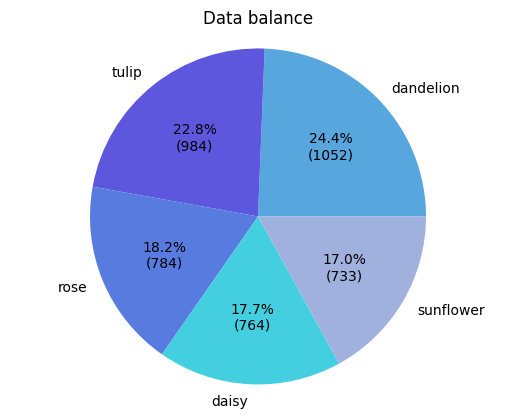

In [ ]:
data_balance = image_df['Label'].value_counts()

def custom_autopct(pct):
    total = sum(data_balance)
    val = int(round(pct*total/100.0))
    return "{:.1f}%\n({:d})".format(pct, val)


# pie chart for data balance
plt.pie(data_balance, labels = data_balance.index, autopct=custom_autopct, colors = ["#57A6DE","#5D57DE","#577BDE","#43CFE0","#A0B1DE"])
plt.title("Data balance")
plt.axis("equal")
plt.show()

In [ ]:
image_df.shape

(4317, 2)

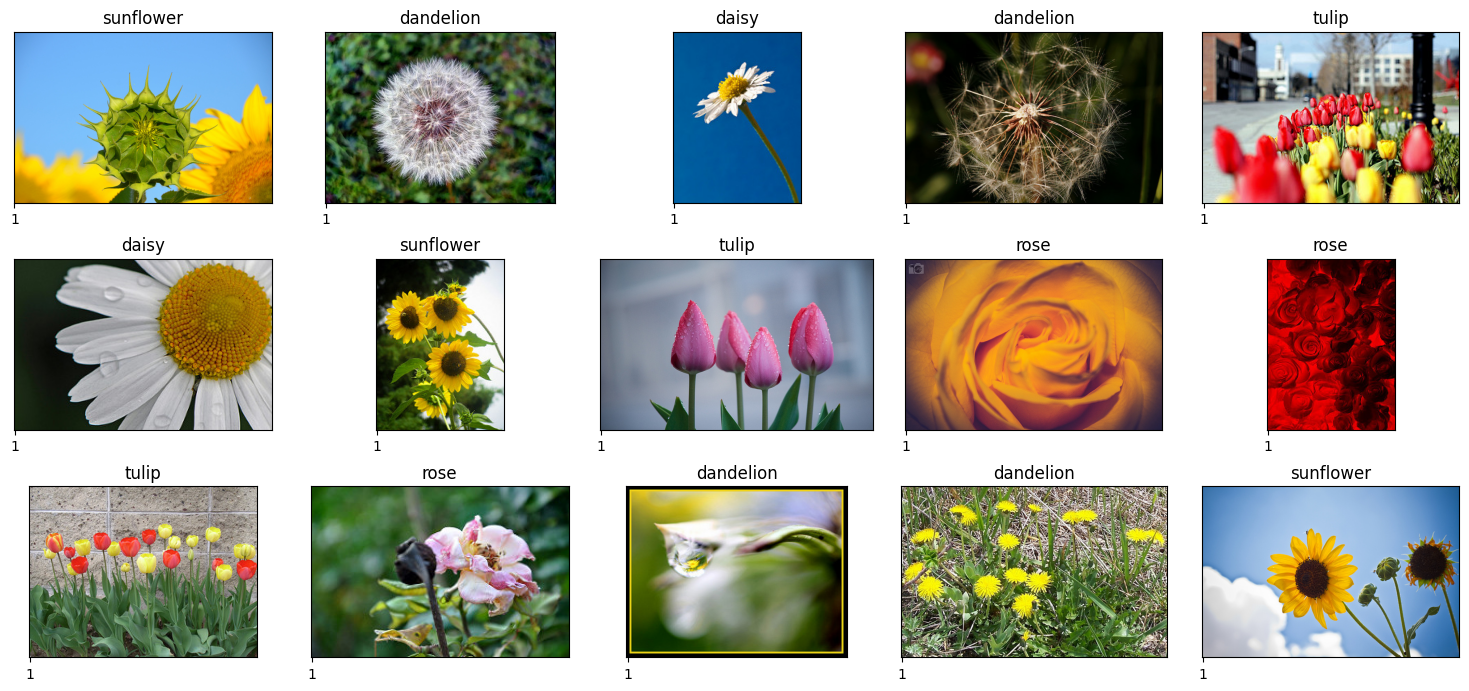

In [ ]:
fig,axes=plt.subplots(nrows=3,ncols=5,figsize=(15,7),subplot_kw={'xticks':[1],'yticks':[]})


for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
# data --> 80% train data && 20% (test, val)
train_df, ts_df = train_test_split(image_df, train_size = 0.8, shuffle = True, random_state = 42)

# test data --> 10% train data && 10% (test, val)
valid_df, test_df = train_test_split(ts_df, train_size = 0.5, shuffle = True, random_state = 42)

In [ ]:
train_df.shape

(3453, 2)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_df.head()

Filepath      Label
279   /content/flowers/dandelion/18089878729_907ed2c...  dandelion
3435  /content/flowers/dandelion/144686365_d7e96941e...  dandelion
3523  /content/flowers/tulip/18245124970_e68fd3f3c3.jpg      tulip
1864  /content/flowers/sunflower/5923085891_27617463...  sunflower
2028  /content/flowers/tulip/21084139365_f44cd2a685_...      tulip

In [ ]:
train_df.tail()

Filepath      Label
3444  /content/flowers/tulip/13900235284_32ce563633_...      tulip
466   /content/flowers/daisy/16527403771_2391f137c4_...      daisy
3092  /content/flowers/sunflower/7586498522_4dcab1c8...  sunflower
3772  /content/flowers/rose/5001844187_0a77b2eed6_n.jpg       rose
860   /content/flowers/rose/12338444334_72fcc2fc58_m...       rose

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2763 validated image filenames belonging to 5 classes.
Found 690 validated image filenames belonging to 5 classes.
Found 432 validated image filenames belonging to 5 classes.


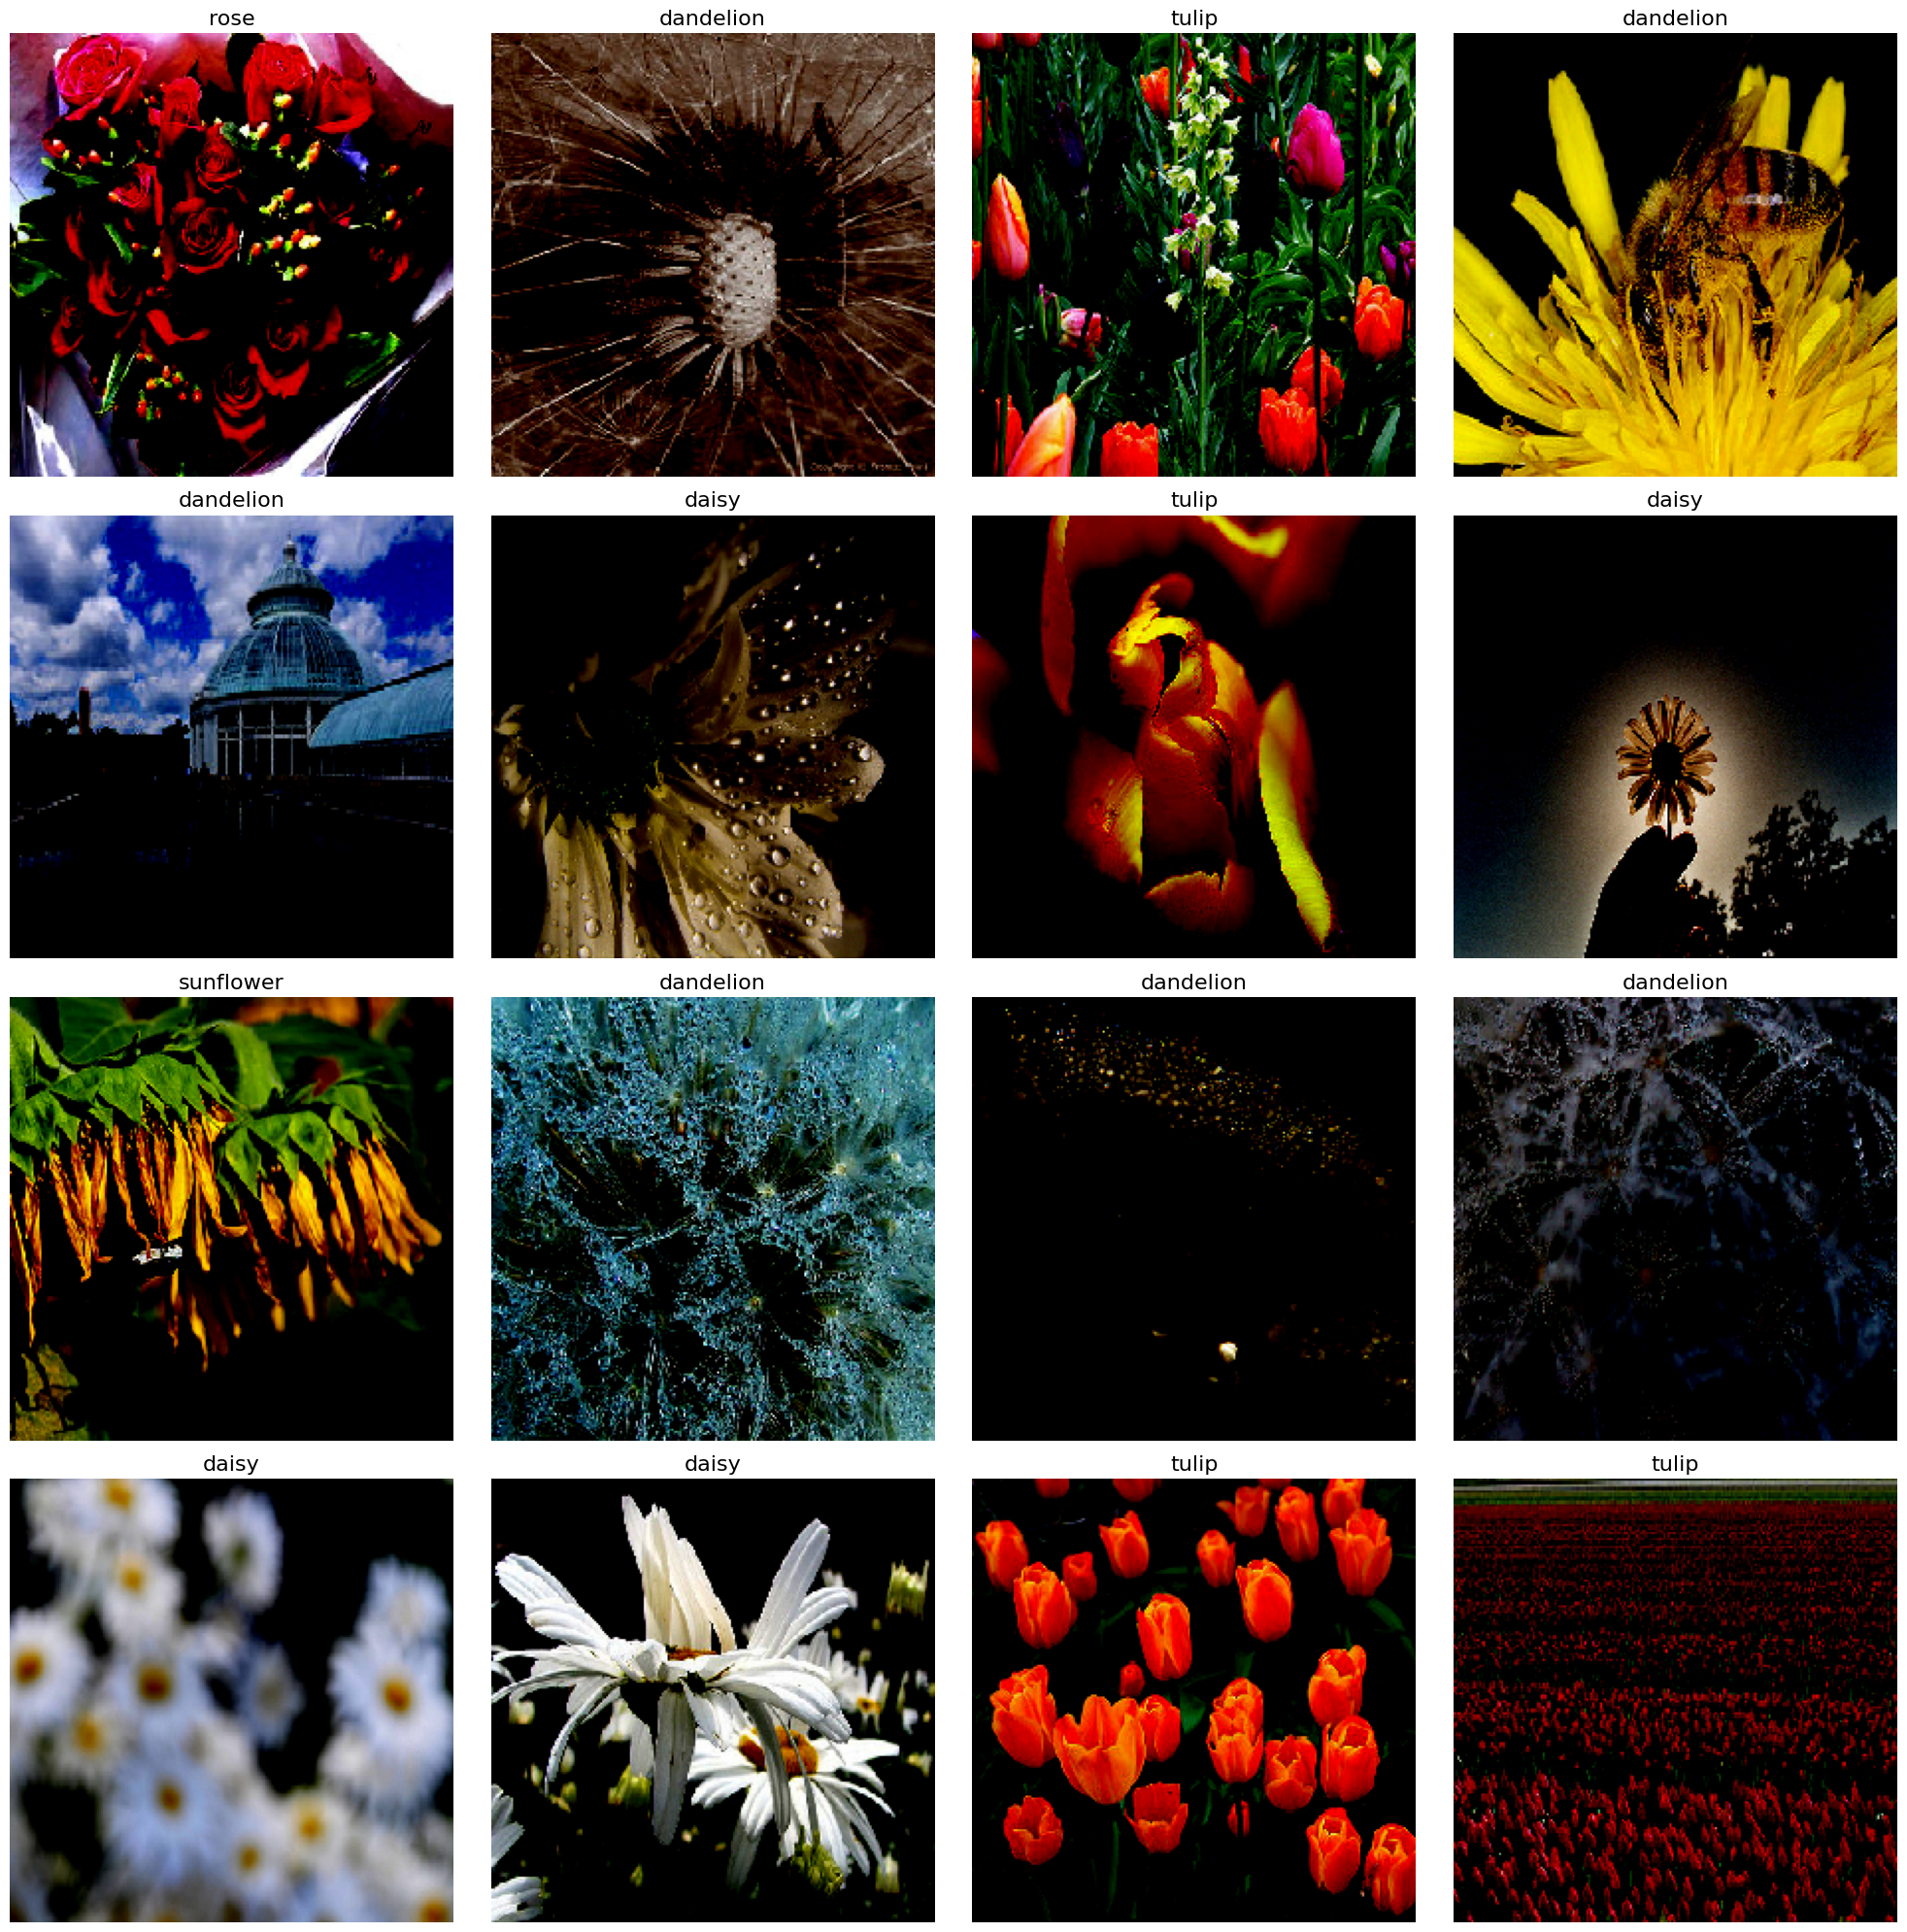

In [ ]:
batch_size=16
g_dict = train_images.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_images)      # get a batch size samples from the generator

# ploting the patch size samples
plt.figure(figsize= (20, 20))

for i in range(batch_size):
    plt.subplot(4, 4, i + 1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'black', fontsize= 16)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def create_model(input_shape=(224, 224, 3)):

    inputs = Input(input_shape)
    base_model = EfficientNetB1(input_shape=input_shape, include_top=False, classes=5)

    x = base_model(inputs)

    x = GlobalAveragePooling2D()(x)
#     x = Dropout(0.1)(x)

    x = Dense(56, activation='relu')(x)
    x = Dropout(0.1)(x)

    outputs = Dense(5, activation='sigmoid')(x)

    model = Model(inputs, outputs)

    return model
K.clear_session()

model = create_model((224, 224, 3))
# model = load_model('models/checkpoint/EfficientNetB0.h5')

metrics = [
    'accuracy',
    'AUC'
]

27018416/27018416 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=metrics)

In [ ]:
checkpoint_path = 'models/EfficientNetB1/model_224.keras'

callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False)
]

In [ ]:
%%time
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=5,
    callbacks=callbacks
)

Epoch 1/5
87/87 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9967 - auc: 0.9999
Epoch 1: val_loss did not improve from 0.21908
87/87 [==============================] - 36s 409ms/step - loss: 0.0090 - accuracy: 0.9967 - auc: 0.9999 - val_loss: 0.2216 - val_accuracy: 0.9478 - val_auc: 0.9911 - lr: 1.0000e-06
Epoch 2/5
87/87 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9989 - auc: 1.0000
Epoch 2: val_loss did not improve from 0.21908
87/87 [==============================] - 34s 389ms/step - loss: 0.0052 - accuracy: 0.9989 - auc: 1.0000 - val_loss: 0.2207 - val_accuracy: 0.9478 - val_auc: 0.9910 - lr: 1.0000e-06
Epoch 3/5
87/87 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 0.9975 - auc: 0.9999
Epoch 3: val_loss did not improve from 0.21908
87/87 [==============================] - 34s 395ms/step - loss: 0.0078 - accuracy: 0.9975 - auc: 0.9999 - val_loss: 0.2220 - val_accuracy: 0.9478 - val_auc: 0.9910 - lr: 1.0000

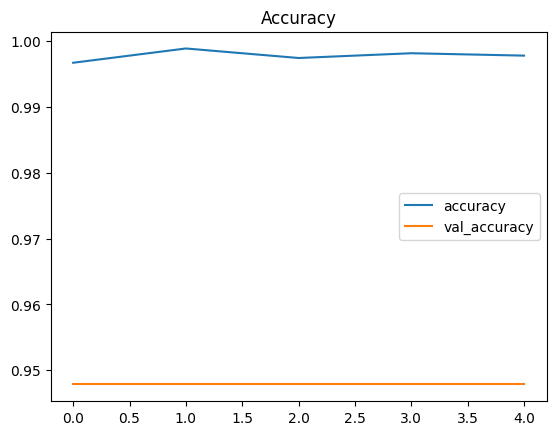

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

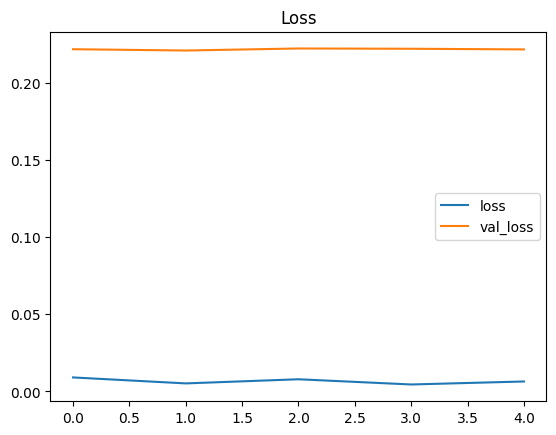

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.22233
Test Accuracy: 94.21%


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

14/14 [==============================] - 2s 142ms/step
The first 5 predictions: ['tulip', 'daisy', 'sunflower', 'dandelion', 'dandelion']


In [ ]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       daisy       0.95      0.94      0.94        80
   dandelion       0.97      0.95      0.96       120
        rose       0.91      0.92      0.92        65
   sunflower       0.96      0.96      0.96        78
       tulip       0.90      0.93      0.92        89

    accuracy                           0.94       432
   macro avg       0.94      0.94      0.94       432
weighted avg       0.94      0.94      0.94       432



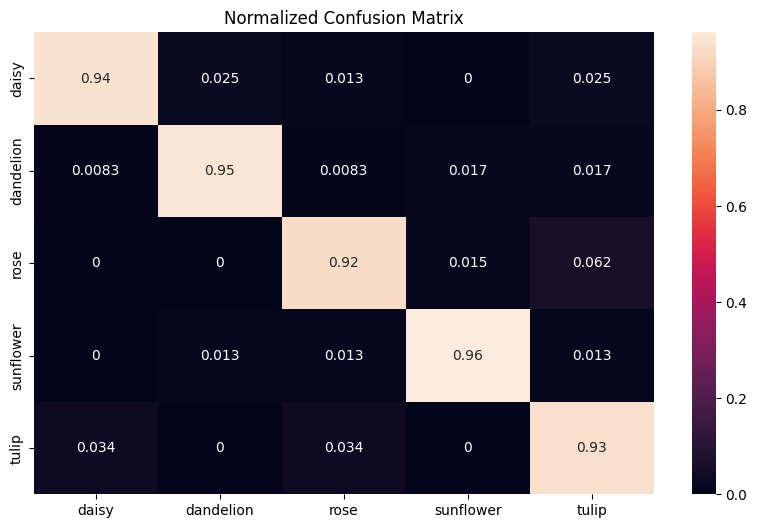

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

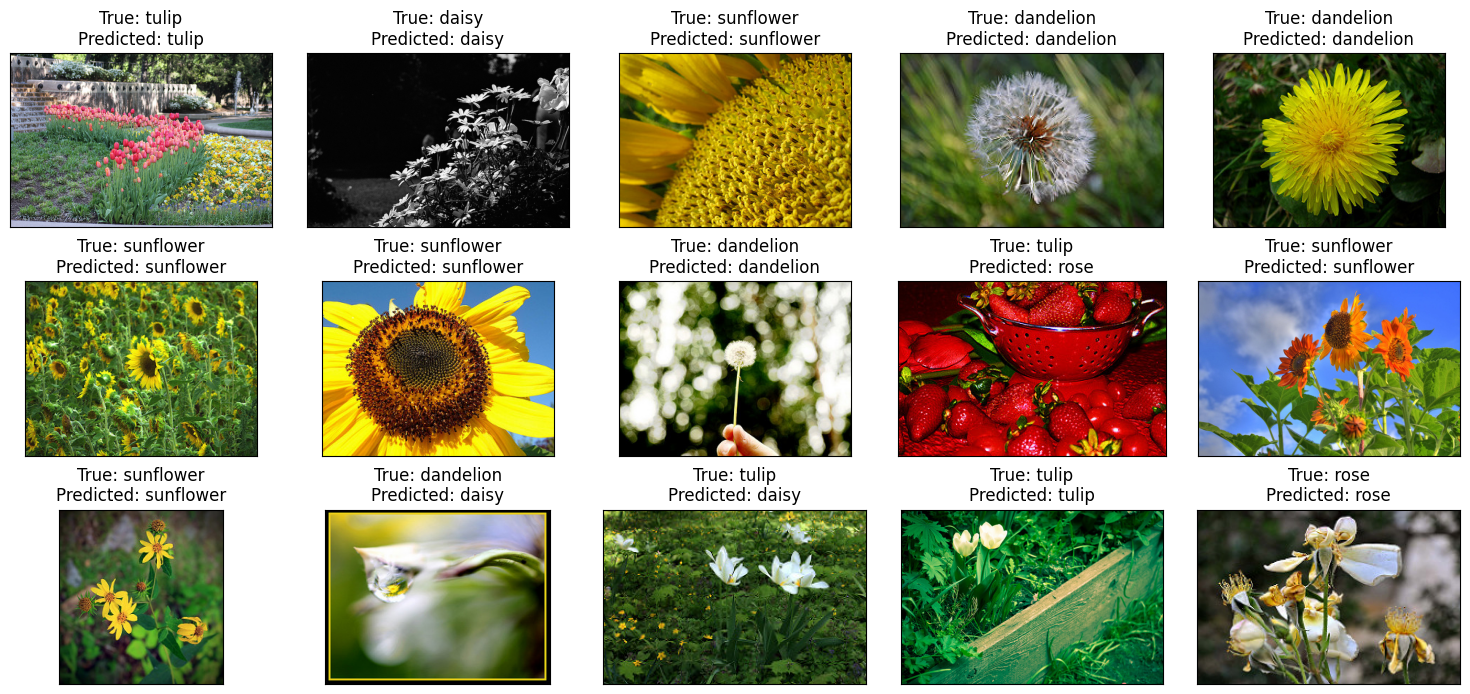

In [ ]:
# Display 15 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
model.save('FlowerRecognition.h5')

In [ ]:
model.save(filepath="save_model/")

In [ ]:
from tensorflow.keras.models import load_model
plant = load_model('FlowerRecognition.h5')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, DenseNet121
from tensorflow.keras.optimizers import Adam

def create_simple_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(5, activation='softmax')  # Assuming 5 classes
    ])
    return model

def create_vgg16_transfer(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])
    return model

def create_densenet(input_shape):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])
    return model

input_shape = (224, 224, 3)  # Gerektiğinde hesaplanan ortalama boyuta göre güncelleyin
simple_cnn = create_simple_cnn(input_shape)
vgg16_transfer = create_vgg16_transfer(input_shape)
densenet = create_densenet(input_shape)

simple_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_transfer.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
densenet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.models import Sequential

def train_and_evaluate(models, train_generator, val_generator, epochs=20):
    best_accuracy = 0
    best_model = None

    for model in models:
        print(f"Training model: {model.name}")
        history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)
        # Doğrulama veri seti üzerinde en iyi accuracy değerini al
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Model {model.name} Validation Accuracy: {val_accuracy:.4f}")

        # En yüksek doğruluk oranına sahip modeli güncelle
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model = model

    print(f"Best model is {best_model.name} with a validation accuracy of {best_accuracy:.4f}")
    return best_model

# Model listesini oluştur
models = [simple_cnn, vgg16_transfer, densenet]

# Model adlarını ayarla
simple_cnn._name = 'Simple_CNN'
vgg16_transfer._name = 'VGG16_Transfer'
densenet._name = 'DenseNet'

# Fonksiyonu çağır
best_model = train_and_evaluate(models, train_images, val_images, epochs=10)


Training model: Simple_CNN
Epoch 1/10
87/87 [==============================] - 18s 137ms/step - loss: 1.5275 - accuracy: 0.4387 - val_loss: 1.1652 - val_accuracy: 0.5319
Epoch 2/10
87/87 [==============================] - 11s 123ms/step - loss: 1.0008 - accuracy: 0.5986 - val_loss: 1.0035 - val_accuracy: 0.5971
Epoch 3/10
87/87 [==============================] - 10s 114ms/step - loss: 0.8537 - accuracy: 0.6746 - val_loss: 1.0033 - val_accuracy: 0.6043
Epoch 4/10
87/87 [==============================] - 11s 124ms/step - loss: 0.6693 - accuracy: 0.7430 - val_loss: 1.0105 - val_accuracy: 0.6116
Epoch 5/10
87/87 [==============================] - 11s 124ms/step - loss: 0.4810 - accuracy: 0.8151 - val_loss: 1.1020 - val_accuracy: 0.6420
Epoch 6/10
87/87 [==============================] - 11s 126ms/step - loss: 0.2926 - accuracy: 0.9048 - val_loss: 1.3319 - val_accuracy: 0.6217
Epoch 7/10
87/87 [==============================] - 10s 120ms/step - loss: 0.1655 - accuracy: 0.9443 - val_loss: 1.